In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Stock_data.csv')

df['Date'] = df['Gmt time'].apply(lambda x: x.split(' ')[0])
df['Time'] = df['Gmt time'].apply(lambda x: x.split(' ')[1])

df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time']).dt.time

<ipython-input-14-9b6b8c24bc84>:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [15]:
print(df.head())

                  Gmt time      Volume     Open      High       Low     Close  \
0  12.12.2012 00:00:00.000  11011.3902  1.23492  1.235890  1.233830  1.235200   
1  12.12.2012 04:00:00.000  13271.5599  1.23521  1.235510  1.233860  1.234340   
2  12.12.2012 08:00:00.000  26716.2305  1.23435  1.236370  1.233305  1.234905   
3  12.12.2012 12:00:00.000  28430.1602  1.23491  1.237285  1.234850  1.236810   
4  12.12.2012 16:00:00.000  33124.1904  1.23680  1.238700  1.236285  1.238205   

        Date      Time  
0 2012-12-12  00:00:00  
1 2012-12-12  04:00:00  
2 2012-12-12  08:00:00  
3 2012-12-12  12:00:00  
4 2012-12-12  16:00:00  


Enter start date (YYYY-MM-DD): 2012-06-30
Enter end date (YYYY-MM-DD): 2013-01-30


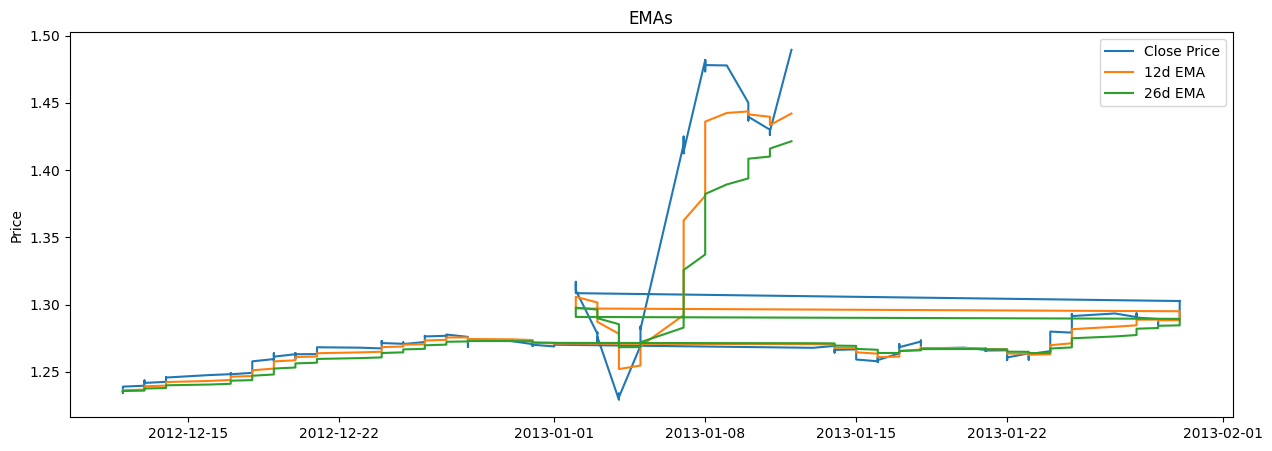

In [16]:
#1) Ask user for start date and end date between that period calculate. 12-period EMA and 26-period EMA are two moving averages.
#Calculate them and plot These two with Close price in a line chart

start_date = input("Enter start date (YYYY-MM-DD): ")
end_date = input("Enter end date (YYYY-MM-DD): ")

df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)].copy()

df['12d_EMA'] = df['Close'].ewm(span=12, adjust=False).mean()
df['26d_EMA'] = df['Close'].ewm(span=26, adjust=False).mean()

plt.figure(figsize=(15,5))

plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['12d_EMA'], label='12d EMA')
plt.plot(df['Date'], df['26d_EMA'], label='26d EMA')

plt.legend()
plt.ylabel('Price')
plt.title('EMAs')
plt.show()

Enter start date (YYYY-MM-DD): 2012-01-30
Enter end date (YYYY-MM-DD): 2013-06-30


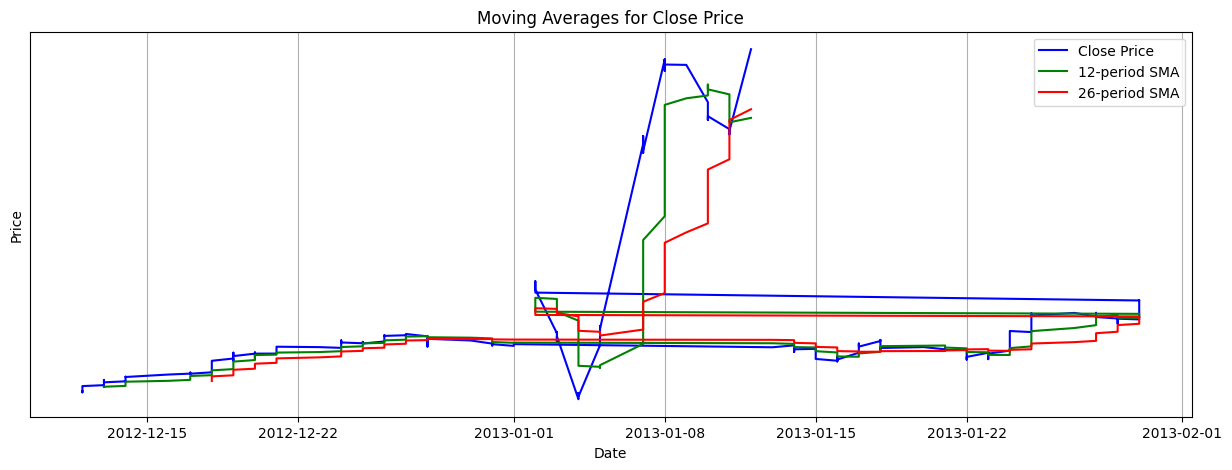

In [17]:
#2) Ask user for start date and end date between that period calculate. 12-period SMA and 26-period SMA are two moving averages. Calculate them and plot These two with Close price in a line chart

start_date = input("Enter start date (YYYY-MM-DD): ")
end_date = input("Enter end date (YYYY-MM-DD): ")

df['Date'] = pd.to_datetime(df['Date'])
df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

df['SMA_12'] = df['Close'].rolling(window=12).mean()
df['SMA_26'] = df['Close'].rolling(window=26).mean()

plt.figure(figsize=(15,5))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.plot(df['Date'], df['SMA_12'], label='12-period SMA', color='green')
plt.plot(df['Date'], df['SMA_26'], label='26-period SMA', color='red')

plt.title('Moving Averages for Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.yticks(np.arange(1100, max(df['Close']) + 100, 100))
plt.show()

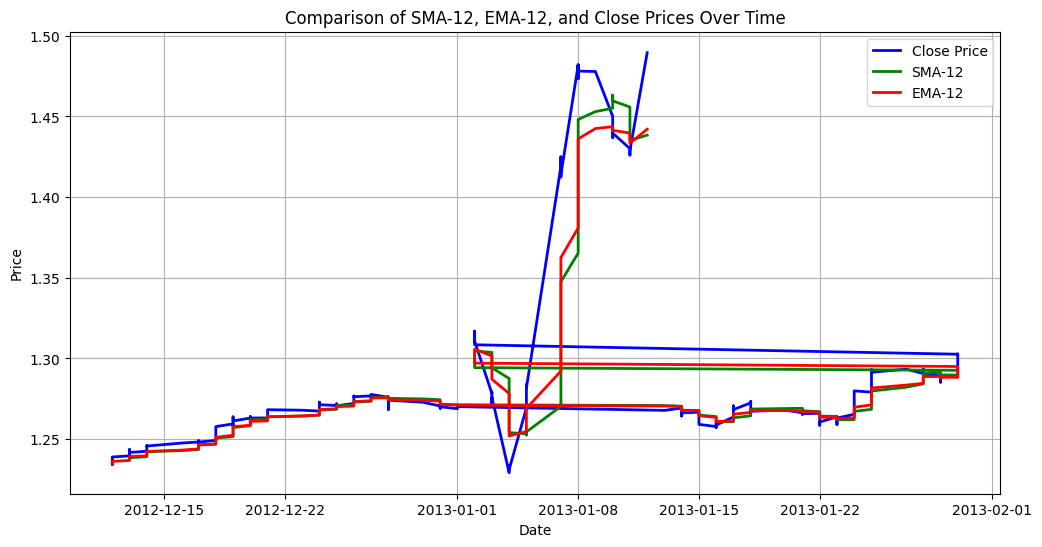

In [26]:
#a)  compare SMA 12 EMA 12 and CLOSE

sma_period = 12
df['SMA-12'] = df['Close'].rolling(window=sma_period).mean()
ema_period = 12
df['EMA-12'] = df['Close'].ewm(span=ema_period, adjust=False).mean()

dates = pd.to_datetime(df['Date'])
close_prices = df['Close']
sma_12 = df['SMA-12']
ema_12 = df['EMA-12']
plt.figure(figsize=(12, 6))
plt.plot(dates, close_prices, label='Close Price', color='blue', linewidth=2)
plt.plot(dates, sma_12, label='SMA-12', color='green', linewidth=2)
plt.plot(dates, ema_12, label='EMA-12', color='red', linewidth=2)

plt.title('Comparison of SMA-12, EMA-12, and Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


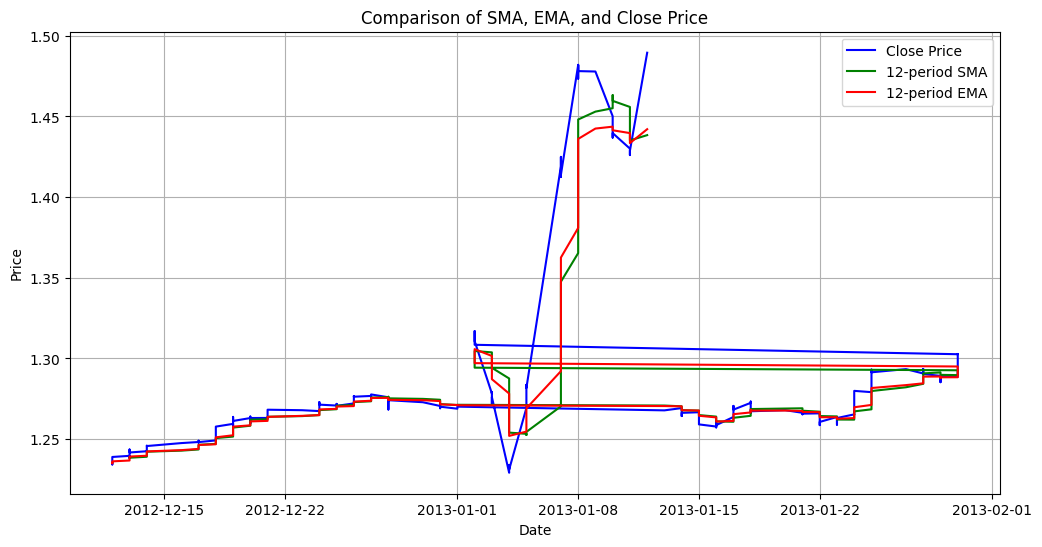

In [19]:
#b) compare SMA 26 EMA 26 and CLOSE

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.plot(df['Date'], df['SMA_12'], label='12-period SMA', color='green')
plt.plot(df['Date'], df['EMA_12'], label='12-period EMA', color='red')

plt.title('Comparison of SMA, EMA, and Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

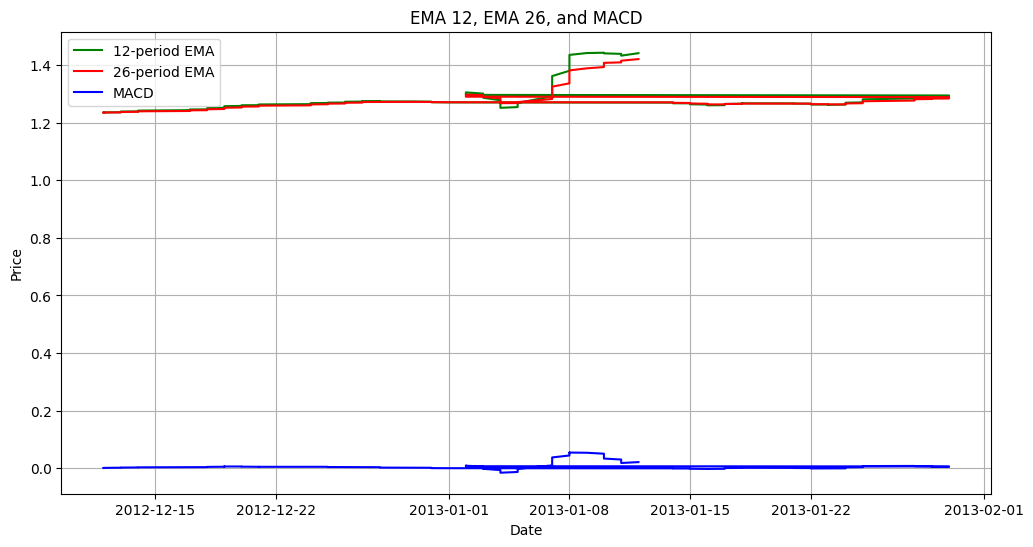

In [20]:
df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()

df['MACD'] = df['EMA_12'] - df['EMA_26']

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['EMA_12'], label='12-period EMA', color='green')
plt.plot(df['Date'], df['EMA_26'], label='26-period EMA', color='red')
plt.plot(df['Date'], df['MACD'], label='MACD', color='blue')

plt.title('EMA 12, EMA 26, and MACD')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

In [21]:
#6) RSI 12 vs close

df['Price Change'] = df['Close'].diff()
period = 12

df['Gain'] = np.where(df['Price Change'] > 0, df['Price Change'], 0)
df['Average Gain'] = df['Gain'].rolling(window=period).mean()
df['Loss'] = np.where(df['Price Change'] < 0, -df['Price Change'], 0)
df['Average Loss'] = df['Loss'].rolling(window=period).mean()

df['RS'] = df['Average Gain'] / df['Average Loss']

df['RSI'] = 100 - (100 / (1 + df['RS']))
print(df[['Date', 'Close', 'RSI']])

           Date     Close        RSI
0    2012-12-12  1.235200        NaN
1    2012-12-12  1.234340        NaN
2    2012-12-12  1.234905        NaN
3    2012-12-12  1.236810        NaN
4    2012-12-12  1.238205        NaN
...         ...       ...        ...
1436 2013-01-11  1.426050   7.591961
1437 2013-01-11  1.429250  12.094634
1438 2013-01-11  1.429705  13.183133
1439 2013-01-11  1.428770  13.048064
1564 2013-01-12  1.489465  69.805244

[220 rows x 3 columns]


In [22]:
#7) RSI 26 vs close
df['Price Change'] = df['Close'].diff()
period = 26

df['Gain'] = np.where(df['Price Change'] > 0, df['Price Change'], 0)
df['Average Gain'] = df['Gain'].rolling(window=period).mean()
df['Loss'] = np.where(df['Price Change'] < 0, -df['Price Change'], 0)
df['Average Loss'] = df['Loss'].rolling(window=period).mean()

df['RS'] = df['Average Gain'] / df['Average Loss']
df['RSI'] = 100 - (100 / (1 + df['RS']))

print(df[['Date', 'Close', 'RSI']])

           Date     Close        RSI
0    2012-12-12  1.235200        NaN
1    2012-12-12  1.234340        NaN
2    2012-12-12  1.234905        NaN
3    2012-12-12  1.236810        NaN
4    2012-12-12  1.238205        NaN
...         ...       ...        ...
1436 2013-01-11  1.426050  73.806011
1437 2013-01-11  1.429250  73.604014
1438 2013-01-11  1.429705  73.151677
1439 2013-01-11  1.428770  72.853295
1564 2013-01-12  1.489465  77.617516

[220 rows x 3 columns]


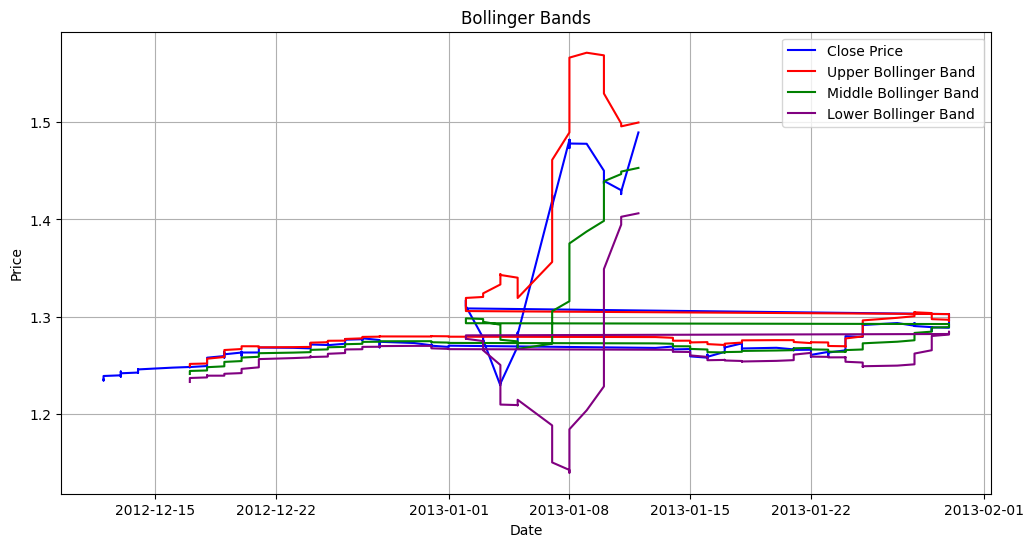

In [23]:
#8) Bollinger bands all three vs close
period = 20
df['Middle Band'] = df['Close'].rolling(window=period).mean()
df['Std Dev'] = df['Close'].rolling(window=period).std()
df['Upper Band'] = df['Middle Band'] + (2 * df['Std Dev'])
df['Lower Band'] = df['Middle Band'] - (2 * df['Std Dev'])
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.plot(df['Date'], df['Upper Band'], label='Upper Bollinger Band', color='red')
plt.plot(df['Date'], df['Middle Band'], label='Middle Bollinger Band', color='green')
plt.plot(df['Date'], df['Lower Band'], label='Lower Bollinger Band', color='purple')
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


In [24]:

adx_period = 14
df['TR'] = np.max([df['High'] - df['Low'], (df['High'] - df['Close'].shift(1)).abs(), (df['Low'] - df['Close'].shift(1)).abs()], axis=0)
df['+DM'] = np.where((df['High'] - df['High'].shift(1)) > (df['Low'].shift(1) - df['Low']), df['High'] - df['High'].shift(1), 0)
df['-DM'] = np.where((df['Low'].shift(1) - df['Low']) > (df['High'] - df['High'].shift(1)), df['Low'].shift(1) - df['Low'], 0)
smoothed_plus_dm = df['+DM'].rolling(window=adx_period).mean()
smoothed_minus_dm = df['-DM'].rolling(window=adx_period).mean()
df['+DI'] = (smoothed_plus_dm / df['TR']) * 100
df['-DI'] = (smoothed_minus_dm / df['TR']) * 100
df['DX'] = (abs(df['+DI'] - df['-DI']) / (df['+DI'] + df['-DI'])) * 100
df['ADX'] = df['DX'].rolling(window=adx_period).mean()


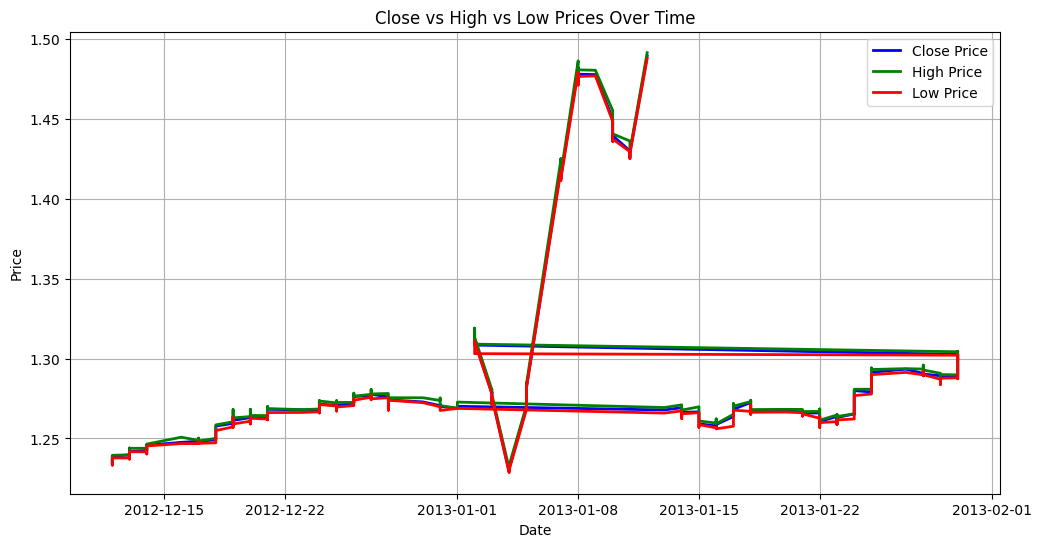

In [25]:
dates = pd.to_datetime(df['Date'])
close_prices = df['Close']
high_prices = df['High']
low_prices = df['Low']
plt.figure(figsize=(12, 6))
plt.plot(dates, close_prices, label='Close Price', color='blue', linewidth=2)
plt.plot(dates, high_prices, label='High Price', color='green', linewidth=2)
plt.plot(dates, low_prices, label='Low Price', color='red', linewidth=2)

plt.title('Close vs High vs Low Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()